In [12]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score

import matplotlib.pyplot as plt
%matplotlib qt

# dataset

In [42]:
df = pd.read_csv('/home/srivyshnav/experiments/uci-epileptic-seizure-recognition/data/data.csv')

df['y_binary'] = df['y'].apply(lambda x: 1 if x == 1 else 0)

In [44]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x171,x172,x173,x174,x175,x176,x177,x178,y,y_binary
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000,1.000000


In [45]:
df['y_binary'].value_counts()

0    9200
1    2300
Name: y_binary, dtype: int64

In [37]:
x = df[df.columns[1:-1]]
y = df['y_binary']

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Models

## Base classifier

In [38]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [39]:
confusion_matrix(y_test, y_pred)

array([[2741,    0],
       [  52,  657]])

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2741
           1       1.00      0.93      0.96       709

    accuracy                           0.98      3450
   macro avg       0.99      0.96      0.98      3450
weighted avg       0.99      0.98      0.98      3450



In [41]:
f1_score(y_test, y_pred)

0.9619326500732064

In [34]:
import pywt
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

gaus1


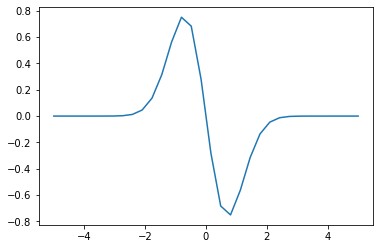

gaus2


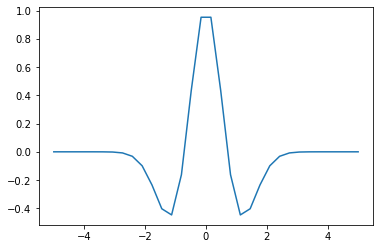

gaus3


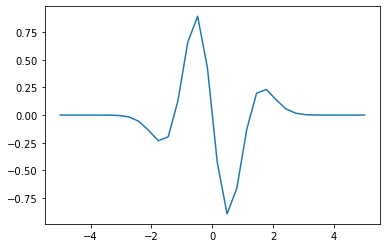

gaus4


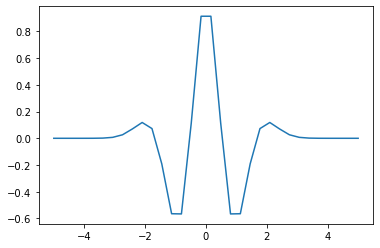

gaus5


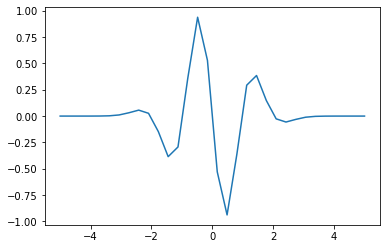

gaus6


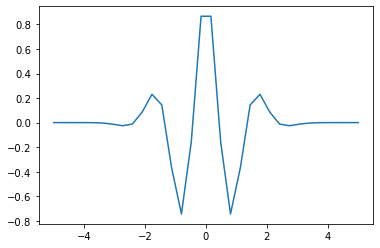

gaus7


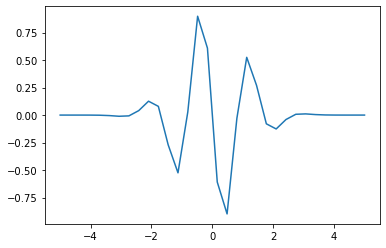

gaus8


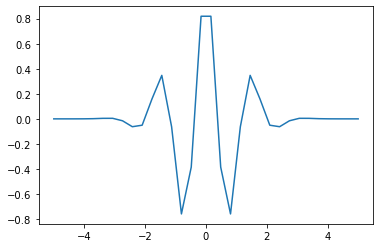

mexh


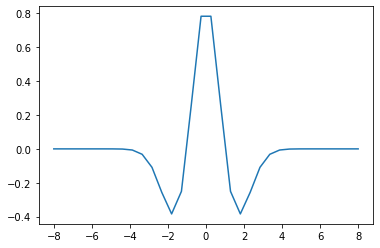

morl


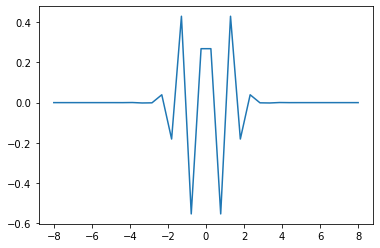

shan


/tmp/ipykernel_21286/3740489374.py:4: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe form shanB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: shan1.5-1.0).
  y, x = pywt.ContinuousWavelet(wav).wavefun(level=5)
/home/srivyshnav/miniconda3/envs/exp/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


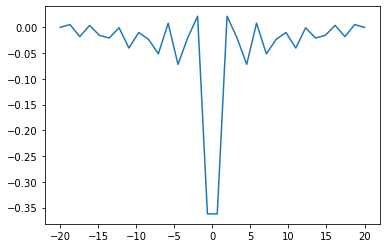

In [44]:
for wav in pywt.wavelist(kind='continuous')[10:]:
    print(wav)
    plt.close()
    y, x = pywt.ContinuousWavelet(wav).wavefun(level=5)
    plt.plot(x, y)
    plt.show()